<!-- <img src="./images/DLI_Header.png" style="width: 400px;"> -->
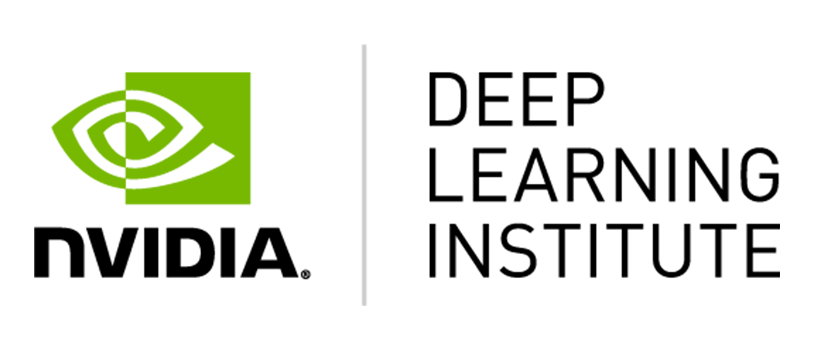



# 합성곱신경망 (Convolutional Neural Networks)

In [ ]:
!git clone https://github.com/jhkim3217/data.git

Cloning into 'data'...
remote: Enumerating objects: 13808, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 13808 (delta 1), reused 6 (delta 1), pack-reused 13802
Receiving objects: 100% (13808/13808), 1.83 GiB | 29.97 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (13777/13777), done.


이전 섹션에서 우리는 ASL 이미지를 분류하는 간단한 모델을 설계하고 학습했습니다. 모델은 매우 높은 정확도로 학습(Training) 데이터를 올바르게 분류하였지만, 검증(Validation) 데이터셋에서는 잘 작동하지 않았습니다. 학습하지 않은 데이터를 잘 일반화하지 못하는 현상을 [과적합](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)이라고 부르며, 이번 섹션에서 우리는 이미지를 읽고 분류하는데 자주 사용되는 [합성곱신경망(CNN)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) 이라고 불리는 모델을 배울 예정입니다.

## 목표

* CNN 모델을 위한 데이터 준비
* 세련된 형태의 CNN 모델 생성, 다양한 layer들의 이해
* CNN 모델 학습 및 성능 관찰

## 데이터 준비 및 로드

아래 셀은 이전 lab에서 학습한 데이터 전처리 기술이 포함되어 있습니다. 다음 단계로 가기 이전 실행하신 후 검토하십시오.

In [ ]:
from tensorflow import keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("./data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("./data/asl_data/sign_mnist_valid.csv")

In [ ]:
train_df.head()
train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27450,12,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,22,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,17,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,16,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93
27454,22,179,180,180,180,182,181,182,183,182,...,108,132,170,194,214,203,197,205,209,215


In [ ]:
train_df.describe()
valid_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,10.684467,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.024242,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,10.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,17.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,23.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate out our image vectors
x_train = train_df.values
x_valid = valid_df.values

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(y_train)

(27455, 784)
(27455,)
0         3
1         6
2         2
3         2
4        12
         ..
27450    12
27451    22
27452    17
27453    16
27454    22
Name: label, Length: 27455, dtype: int64


In [ ]:
# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

In [ ]:
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## CNN을 위한 이미지 변환(Reshaping)

마지막 연습문제에서, 데이터셋의 개별 형식은 일렬로 된 784픽셀 형식이었습니다.

In [ ]:
x_train.shape, x_valid.shape

((27455, 784), (7172, 784))

이러한 형식은 서로 가까운 픽셀에 대한 모든 정보를 가지고 있지 않습니다. 그렇기 때문에, feature를 탐지하는 컨볼루션(convolution)을 적용할 수 없습니다. 데이터 셋을 28x28픽셀 형식으로 변경해 보겠습니다. 이를 통해 컨볼루션에서 인접한 픽셀끼리 그룹을 짓고 중요한 feature들을 탐지할 수 있습니다.

모델의 첫 번째 컨볼루션 레이어의 경우 이미지의 높이와 너비뿐만 아니라 [채널](https://www.photoshopessentials.com/essentials/rgb/)의 숫자도 요구된다는 점에 유의해야합니다. 우리의 이미지는 Grayscale이기 때문에 채널은 1의 값을 가져야합니다.

즉, 현재의 shape인 (27455, 784)을 (27455, 28, 28, 1)로 변환할 필요가 있습니다. 편의상, 우리는 동일하게 유지하기를 원하는 모든 차원에 대해 [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html#numpy.reshape)을 진행하는 경우 '-1'을 통해 표현할 수 있으므로 다음과 같이 구성할 수 있습니다.

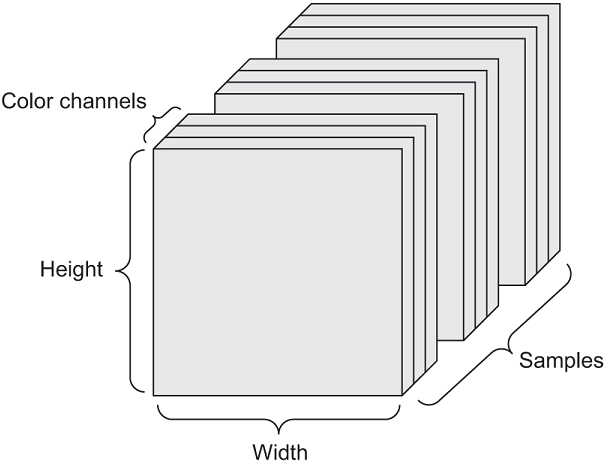

##(Samples, Height, Widht, Color_channels)

##- (27455 ,28, 28, 1)
##- 흑백(Grey Scale)일때 Color Channels = 1

In [ ]:
x_train.shape

(27455, 784)

In [ ]:
print(len(x_train))
print(len(x_train[0]))

27455
784


In [ ]:
x_train = x_train.reshape(27455,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [ ]:
x_train.shape

(27455, 28, 28, 1)

In [ ]:
x_valid.shape

(7172, 28, 28, 1)

In [ ]:
x_train

array([[[[0.41960784],
         [0.4627451 ],
         [0.49803922],
         ...,
         [0.66666667],
         [0.66666667],
         [0.6627451 ]],

        [[0.43529412],
         [0.4745098 ],
         [0.50588235],
         ...,
         [0.67058824],
         [0.67058824],
         [0.66666667]],

        [[0.44313725],
         [0.48235294],
         [0.51372549],
         ...,
         [0.67058824],
         [0.67058824],
         [0.67058824]],

        ...,

        [[0.55686275],
         [0.58823529],
         [0.62352941],
         ...,
         [0.79215686],
         [0.78823529],
         [0.78431373]],

        [[0.55686275],
         [0.59215686],
         [0.62745098],
         ...,
         [0.8       ],
         [0.79607843],
         [0.79215686]],

        [[0.55686275],
         [0.59215686],
         [0.62745098],
         ...,
         [0.8       ],
         [0.79607843],
         [0.79215686]]],


       [[[0.60784314],
         [0.61568627],
         [0.61

In [ ]:
x_train[0].shape

(784,)

In [ ]:
print(len(x_train))
print(len(x_train[0]))
print(len(x_train[0][0]))
print(len(x_train[0][0][0]))


27455
28
28
1


## 합성곱 모델 생성

오늘날, 많은 데이터 과학자는 유사한 프로젝트를 기반으로, 자신만의 프로젝트를 시작합니다. 문제가 완전히 새로운 형태가 아닌 경우, 사람들은 [TensorFlow Hub](https://www.tensorflow.org/hub)나 [NGC Catalog](https://ngc.nvidia.com/catalog/models) 와 같은 온라인 저장소에 게시된 모델과 유사한 모델을 활용할 가능성이 높습니다. 오늘, 우리는 이 문제에 다음과 같은 형태의 모델을 활용할 것입니다.

<!-- <img src="images/cnn.png" width=180 /> -->
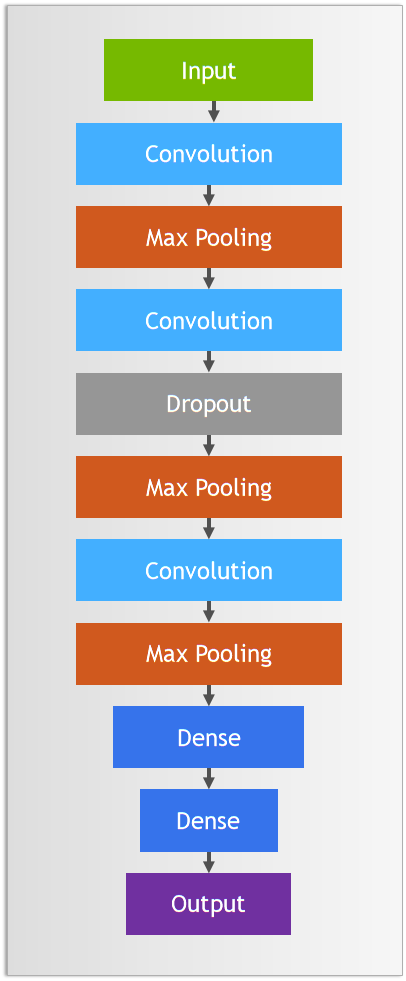

우리는 강의에서 다양한 종류의 레이어들을 이미 공부했고, 여기서도 공식문서를 나타내는 링크와 함께 여기 있는 모든 레이어들을 학습할 것입니다. 의문 사항이 생길 경우 공식 문서를 읽거나 [stack overflow](https://stackoverflow.com/)에 문의하십시오.

In [ ]:
from keras.models import Sequential
from keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))

model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))

model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))

model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

### [Conv2D]

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D






<!-- **굵은 텍스트**<img src="images/conv2d.png" width=300 /> -->
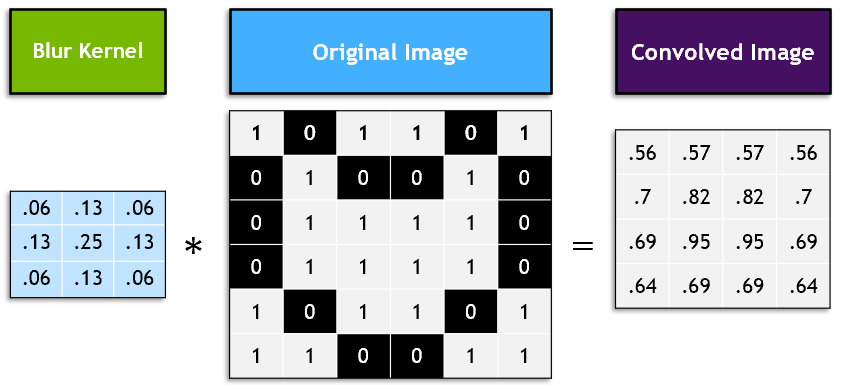
2D 컨볼루션 레이어입니다. 작은 커널은 입력 이미지들을 훑으며, 분류에 중요한 특징들을 파악하게 됩니다. 모델의 초기 컨볼루션은 선과 같은 간단한 특징을 탐지하게 됩니다. 그 이후 컨볼루션은 점점 더 복잡한 특징을 탐지하게 됩니다. 이제 우리의 첫 번째 Conv2D layer를 살펴보겠습니다:
```Python
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same'...)
```
75라는 값은 우리가 학습하게 될 필터(Filter)의 갯수를 의미합니다. (3,3) 은 필터의 크기를 의미합니다. strides는 필터가 이미지를 얼마만큼의 간격으로 이동할 것인지를 나타냅니다. 마지막으로, padding은 입력 이미지와 결과 이미지의 크기를 맞추기 위해서 사용됩니다.

### [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization) (배치정규화)

입력을 정규화하는 것과 마찬가지로, 배치정규화는 hidden layer들의 값을 scaling하여 학습을 개선합니다. [자세한 내용](https://blog.paperspace.com/busting-the-myths-about-batch-normalization/).

### [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

<!-- *이탤릭체 텍스트*<img src="images/maxpool2d.png" width=300 /> -->
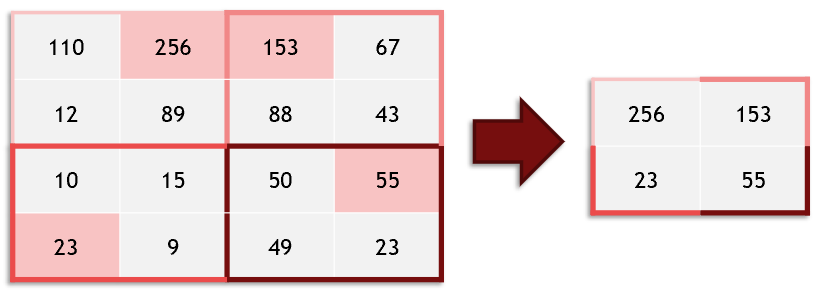
Max pooling은 이미지를 가져와서 더 낮은 해상도로 축소합니다. 이렇게 하면 모델이 약간의 변화에 더욱 견고하게 만들 수 있고, 모델의 학습 및 추론을 더욱 빠르게 할 수 있습니다.

### [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

<!-- <img src="images/dropout.png" width=360 /> -->
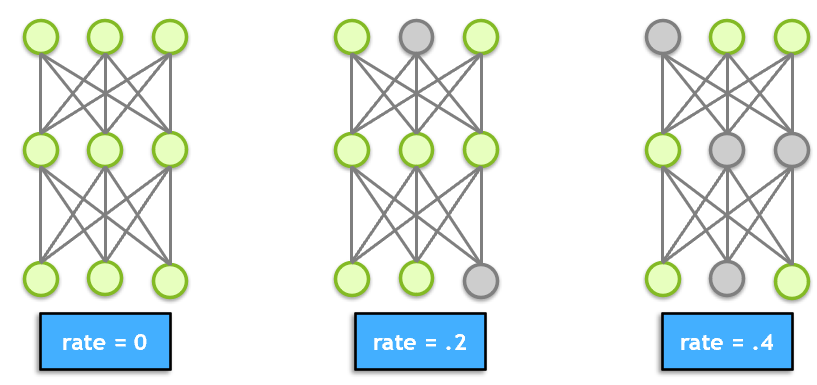
드롭아웃은 과적합(Overfitting)을 방지하는 기술입니다. 드롭아웃은 무작위로 뉴런 중 일부를 선택하고 제외시켜,  뉴런들이 특정 경로에서 forward 혹은 backward progation에 참여하지 않도록 합니다. 이를 통해 네트워크가 한 영역에 의존하여 답을 도출하지 않도록 더욱 견고하고 중복적인 형태의 모델을 구성할 수 있습니다.

### [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) (평탄화)

Flatten은 다차원 입력을 1차원으로 변환시켜 줍니다. Flatten의 결과는 분류를 위한 마지막 layer로 연결되며, feature vector라고 불리게 됩니다.

### [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

이전 모델에서 이미 dense 레이어를 다룬 적이 있습니다. 현재 모델의 첫 dense 레이어 (512 유닛)는 feature vector를 입력으로 받으며, 어떠한 Feature가 분류에 기여하는지를 학습하게 됩니다. 두 번째 dense 레이어 (24 유닛)는 우리의 분류 예측 결과를 위한 마지막 layer로 활용됩니다.

## 모델 요약

다소 복잡하게 느껴질 수 있지만 걱정할 필요는 없습니다. CNN 모델을 효과적으로 훈련하기 위해 지금 당장 모든 것을 이해하는 것은 중요하지 않습니다. 가장 중요한 것은 이미지로부터 유용한 정보를 추출하는 데 도움이 되고 분류 작업에 사용될 수 있다는 것을 알고 계시면 충분합니다.

이제, 방금 만든 모델을 요약할 수 있습니다. 이전 노트북의 모델에 비해 학습가능(Trainable)한  매개 변수가 얼마나 적은지 알아 보십시오.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

## Compiling the Model

이전의 예에서와 동일한 방식으로 모델을 컴파일할 수 있습니다.

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

## Training the Model

매우 다른 모델 구조에도 불구하고, 학습은 거의 비슷한 과정으로 진행됩니다. 아래 셀을 실행하여 20 에포크동안 학습하고, 정확도가 향상되는지 확인해 보겠습니다.

In [ ]:
hist = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 [==============================] - 110s 126ms/step - loss: 0.3003 - accuracy: 0.9079 - val_loss: 0.6863 - val_accuracy: 0.7811
Epoch 2/20
858/858 [==============================] - 111s 129ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.1591 - val_accuracy: 0.9453
Epoch 3/20
858/858 [==============================] - 114s 133ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.2912 - val_accuracy: 0.9370
Epoch 4/20
858/858 [==============================] - 126s 147ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.3234 - val_accuracy: 0.9214
Epoch 5/20
858/858 [==============================] - 117s 137ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.3154 - val_accuracy: 0.9388
Epoch 6/20
858/858 [==============================] - 115s 134ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.3863 - val_accuracy: 0.9180
Epoch 7/20
858/858 [==============================] - 121s 141ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.2542 -

KeyboardInterrupt: 

In [ ]:
print(hist.history)

{'loss': [0.31802231073379517, 0.02097216248512268, 0.010224646888673306, 0.007030174136161804, 0.005949751008301973, 0.001887165941298008, 0.0011967330938205123, 0.0006818361580371857, 0.0002744772064033896, 0.001521733938716352, 0.0005138532724231482, 0.0004826338845305145, 0.0011240682797506452, 0.00040159773197956383, 0.0001263123849639669, 0.0009976648725569248, 0.00021780404495075345, 0.00014832201122771949, 0.0013146582059562206, 7.115253538358957e-05], 'accuracy': [0.9021307826042175, 0.9936259388923645, 0.9974503517150879, 0.9980331659317017, 0.9982516765594482, 0.9993808269500732, 0.9996357560157776, 0.9998179078102112, 0.9999271631240845, 0.9994900822639465, 0.9998907446861267, 0.9997814893722534, 0.999854326248169, 0.9997814893722534, 0.9999635815620422, 0.9996357560157776, 0.9998907446861267, 0.9999271631240845, 0.9996357560157776, 0.9999635815620422], 'val_loss': [0.35626575350761414, 0.21507306396961212, 0.2294345498085022, 0.4394582211971283, 0.18106375634670258, 0.2487

In [ ]:
# 우리가 만든 학습 모델 저장하기
model.save('model/my_asl_model.h5')

In [ ]:
# 내컴에 저장되어 있는 모델 불러오기
from keras.models import load_model

my_model = load_model('model/my_asl_model.h5')
print('model loaded.....')
my_model.summary()

Text(0.5, 1.0, 'Loss')

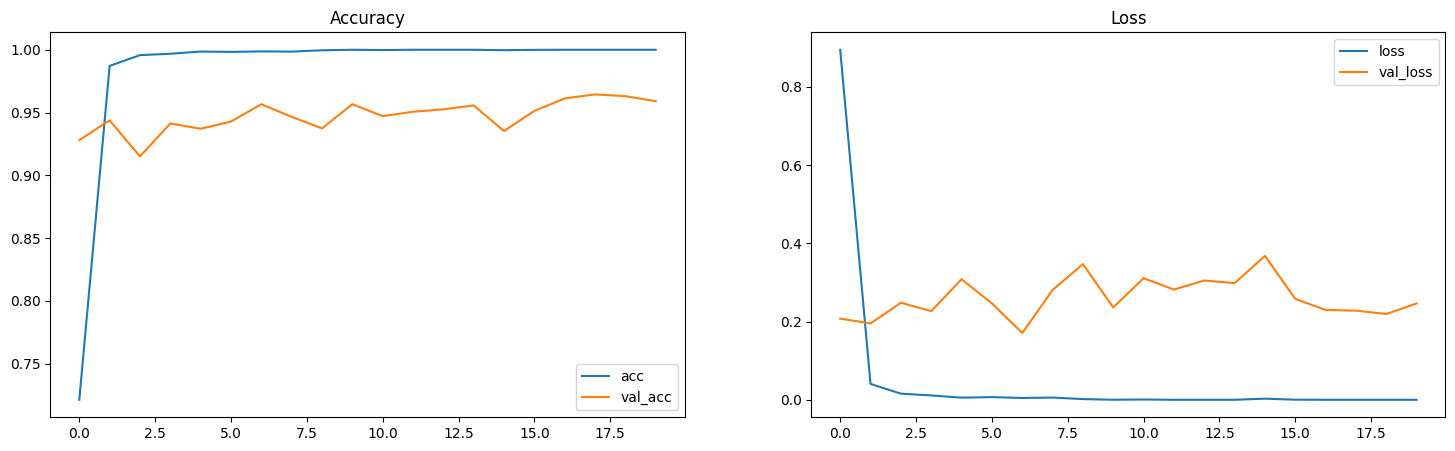

In [ ]:
czzc


## 결과에 대한 논의

이 모델은 상당히 개선된 것 같습니다! 학습 정확도도 매우 높고, 검증 정확도도 향상되었습니다. 이것은 좋은 결과이며, 우리는 단지 모델을 새로운 모델로 바꾸기만 하면 됩니다.

추가적으로, 검증 정확도가 수렴하지 않는 것을 확인하셨을 수 있습니다. 이것은 여전히 우리 모델이 완벽히 일반화가 되지 않았다는 것을 의미합니다. 다행히도, 우리가 추가적으로 할 수 있는 것이 남아있습니다. 그것은 다음장에서 다루도록 하겠습니다.


## 요약

이 섹션에서는 CNN을 구현하기 위해 몇 가지 새로운 종류의 레이어를 활용하여, 이전 섹션에서 사용된 단순한 모델보다 더욱 높은 성능을 기록할 수 있었습니다. 준비된 데이터로 모델을 만들고 훈련하는 전반적인 과정에 더욱 익숙해지시기를 바랍니다.

## 메모리 지우기

넘어가기 전에 다음 셀을 실행하여 GPU 메모리를 지워주시기 바랍니다.

## 다음

마지막 몇 가지 섹션에서는 모델의 생성 및 학습에 초점을 맞추었습니다. 이제 성능을 더욱 향상시키기 위해, 모델이 원래 학습하던 것보다 더 많고 좋은 데이터 제공을 위한 *데이터 증강(Augmentation)*이라 불리는 기법을 학습하도록 하겠습니다.